# PVSC 2022 Perovskite ReMFG vs Recycling: a mass and energy analysis

This journal documents the analysis conducted for PVSC 2022 Mirletz et al conference presentation. It constitutes an initial demonstration of the energy flows of the PV ICE tool.

The comparison will be between a 100% remanfactured module and a 100% recycled module.

In [1]:
import os
from pathlib import Path
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP'/'PVSC2022-Eflows')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_ICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

Your simulation will be stored in C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\PVSC2022-Eflows


In [2]:
PV_ICE.__version__

'v0.2.0+147.gf20f664.dirty'

## Add Scenarios and Materials

We wil create 3 scenarios:
1. baseline linear economy for glass-glass module
2. 100% reMFG the glass
3. 100% recycle the glass

These three scenarios will have the following assumptions:

0. All Scenarios
    - no circularity in MFG scrap
1. Linear economy
    - no reMFG or recycling
2. 100% ReMFG
    - all EoL goes to reMFG, no recycling
    - yields are: 100%
3. 100% Recycle
   - all EoL goes to recycling closed-loop
   - yields are: 100%

In [3]:
cwd=os.getcwd()
print(os.getcwd())

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\tutorials


In [4]:
MATERIALS = ['glass']#,'aluminium_frames','silver','silicon', 'copper', 'encapsulant', 'backsheet']
MATERIAL = MATERIALS[0]
#moduleFile_recycle = r'..\..\baselines\perovskite_modules_US_recycle.csv'
#moduleFile_reMFG = r'..\..\baselines\perovskite_modules_US_reMFG.csv'
moduleFile= r'..\..\baselines\perovskite_modules_US_linear.csv'

In [5]:
r1 = PV_ICE.Simulation(name='perovskite_energies', path=testfolder)

scenarios = ['perovskite_linear', 'perovskite_reMFG', 'perovskite_recycle']

for scen in scenarios: 

    r1.createScenario(name=scen, file=moduleFile)
    for mat in range (0, len(MATERIALS)):
        MATERIALBASELINE = r'..\..\baselines\perovskite_material_'+MATERIALS[mat]+'.csv'
        r1.scenario[scen].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)


path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\PVSC2022-Eflows


### Modify the scenarios to match assumptions

In [6]:
r1.scenario['perovskite_linear'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff',
       'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored',
       'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield',
       'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill',
       'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled'],
      dtype='object')

In [7]:
r1.scenario['perovskite_linear'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG3_ReMFG_target',
       'mat_ReMFG_yield', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG'],
      dtype='object')

In [8]:
#linear
r1.modifyScenario('perovskite_linear', 'mod_Repair', 0.0) #this removes all weibull failures from field immediately
r1.modifyScenario('perovskite_linear', 'mod_MerchantTail', 0.0) # this prevents extended use
r1.modifyScenario('perovskite_linear', 'mod_EOL_collection_eff', 0.0) #this sends everytyhing to landfill


In [9]:
#reMFG
#Module
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_collection_eff', 100.0) #this collects everything
    #path good
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg0_resell', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg1_landfill', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg2_stored', 0.0) #

r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg3_reMFG', 100.0) #send all to remfg
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_reMFG_yield', 100.0) #100% yield of remfg

r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg4_recycled', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_sp_reMFG_recycle', 0.0) #
    #path bad
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pb1_landfill', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pb2_stored', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pb3_reMFG', 100.0) #sends all "bad" modules to remfg, uses same yield above
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pb4_recycled', 0.0) #

#material
r1.scenario['perovskite_reMFG'].modifyMaterials('glass', 'mat_PG3_ReMFG_target', 100.0) #send all to remfg
r1.scenario['perovskite_reMFG'].modifyMaterials('glass', 'mat_PG4_Recycling_target', 0.0) #send none to recycle
r1.scenario['perovskite_reMFG'].modifyMaterials('glass', 'mat_ReMFG_yield', 99.0) #already set to 99, in case change


In [10]:
#recycle
#module
r1.modifyScenario('perovskite_recycle', 'mod_EOL_collection_eff', 100.0) #this collects everything
    #path good
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg0_resell', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg1_landfill', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg2_stored', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg3_reMFG', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_reMFG_yield', 0.0) #

r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg4_recycled', 100.0) #send all to recycle
r1.modifyScenario('perovskite_recycle', 'mod_EOL_sp_reMFG_recycle', 0.0) #
    #path bad
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pb1_landfill', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pb2_stored', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pb3_reMFG', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pb4_recycled', 100.0) #send all to recycle

#material
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_MFG_scrap_Recycled', 100.0) #send all mfg scrap to recycle
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 100.0) #all hq closed-loop
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_PG3_ReMFG_target', 0.0) #send none to remfg
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_PG4_Recycling_target', 100.0) #send all to recycle
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_EOL_RecycledHQ_Reused4MFG', 100.0) #closed-loop
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_EOL_Recycled_into_HQ', 15.0) #HQ??
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_Recycling_yield', 40.0) #yield??


## Run the Mass Flow Calculations on All Scenarios and Materials

In [11]:
r1.calculateMassFlow()

Working on Scenario:  perovskite_linear
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  perovskite_reMFG
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  perovskite_recycle
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


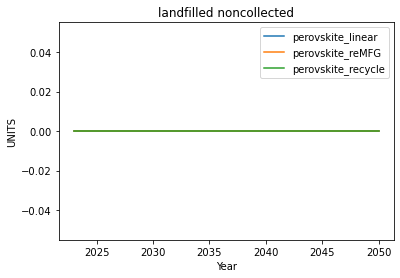

In [12]:
r1.plotScenariosComparison('landfilled_noncollected')

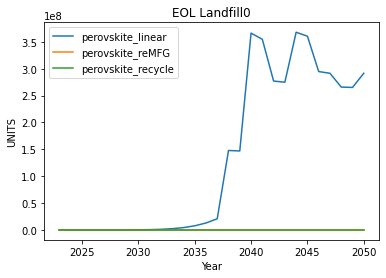

In [13]:
r1.plotScenariosComparison('EOL_Landfill0')

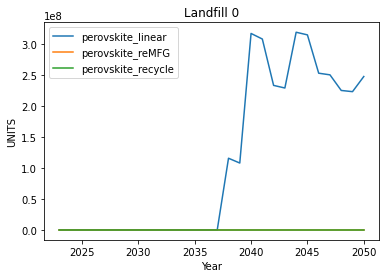

In [14]:
r1.plotScenariosComparison('Landfill_0')

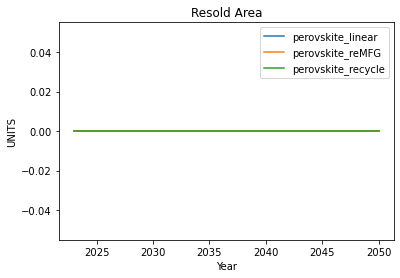

In [15]:
r1.plotScenariosComparison('Resold_Area')

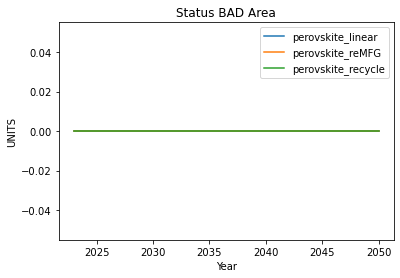

In [16]:
r1.plotScenariosComparison('Status_BAD_Area')

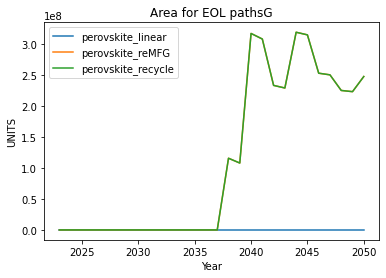

In [17]:
r1.plotScenariosComparison('Area_for_EOL_pathsG')

# Energy Flows

First read in the energy files. Point at a path, then use the PV ICE colde to handle the meta data. Energy values for modules are in kWh/m2 and for materials are in kWh/kg. To ensure unit matching, we will divide the input by 1000 to convert kg to g.

In [18]:
matEfile_glass = str(Path().resolve().parent.parent / 'baselines'/'perovskite_energy_material_glass.csv')

modEfile = str(Path().resolve().parent.parent / 'baselines'/'perovskite_energy_modules.csv')

In [19]:
# Material energy file
file = matEfile_glass
csvdata = open(str(file), 'r', encoding="UTF-8")
csvdata = open(str(file), 'r', encoding="UTF-8-sig")
firstline = csvdata.readline()
secondline = csvdata.readline()



head = firstline.rstrip('\n').split(",")
meta = dict(zip(head, secondline.rstrip('\n').split(",")))



data = pd.read_csv(csvdata, names=head)
data.loc[:, data.columns != 'year'] = data.loc[:, data.columns != 'year'].astype(float)/1000 
#Divide by 1000 go get kg to g
# THIS IS A TEMP FIX
matEfile_glass_simple = data.copy()

In [20]:
#module energy file
file = modEfile
csvdata = open(str(file), 'r', encoding="UTF-8")
csvdata = open(str(file), 'r', encoding="UTF-8-sig")
firstline = csvdata.readline()
secondline = csvdata.readline()



head = firstline.rstrip('\n').split(",")
meta = dict(zip(head, secondline.rstrip('\n').split(",")))



data = pd.read_csv(csvdata, names=head)
data.loc[:, data.columns != 'year'] = data.loc[:, data.columns != 'year'].astype(float)
modEfile_simple = data.copy()

Now run the energy calculation. Currently this is not a class, just a function that will return a dataframe. Each scenario will need to be run seperately, and read in the perovskite energy files.

In [21]:
r1_e_linear = r1.calculateEnergyFlow(scenarios='perovskite_linear', materials='glass', modEnergy=modEfile_simple, matEnergy=matEfile_glass_simple)
r1_e_reMFG = r1.calculateEnergyFlow(scenarios='perovskite_reMFG', materials='glass', modEnergy=modEfile_simple, matEnergy=matEfile_glass_simple)
r1_e_reCYCLE = r1.calculateEnergyFlow(scenarios='perovskite_recycle', materials='glass', modEnergy=modEfile_simple, matEnergy=matEfile_glass_simple)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Energy Analysis

In [22]:
r1_e_linear.index = modEfile_simple['year']
r1_e_reMFG.index = modEfile_simple['year']
r1_e_reCYCLE.index = modEfile_simple['year']

In [23]:
r1_e_linear.keys()

Index(['mod_MFG', 'mod_Install', 'mod_OandM', 'mod_Repair', 'mod_Demount',
       'mod_Store', 'mod_Resell_Certify', 'mod_ReMFG_Disassembly',
       'mod_Recycle_Crush', 'mat_extraction', 'mat_MFG', 'mat_MFGScrap_LQ',
       'mat_MFGScrap_HQ', 'mat_Landfill', 'mat_EoL_ReMFG_clean',
       'mat_Recycled_LQ', 'mat_Recycled_HQ'],
      dtype='object')

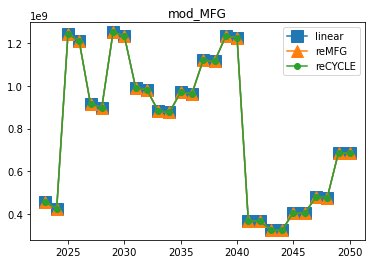

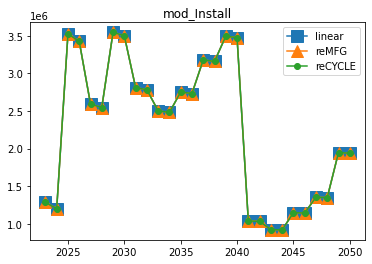

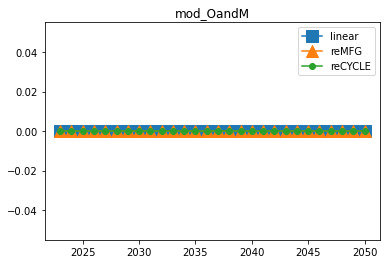

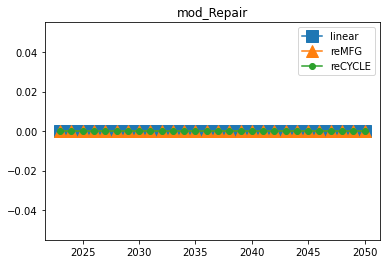

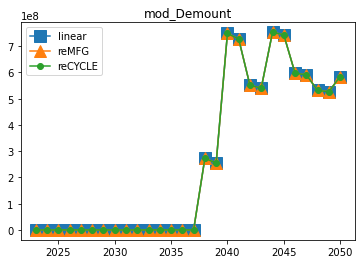

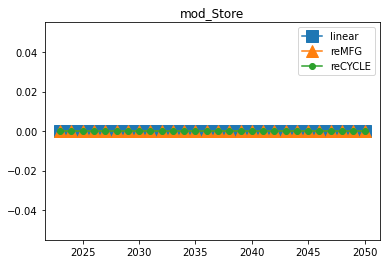

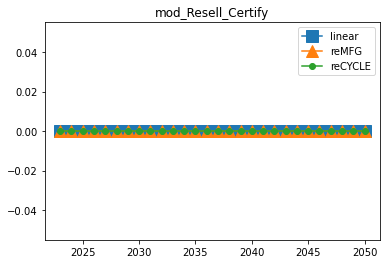

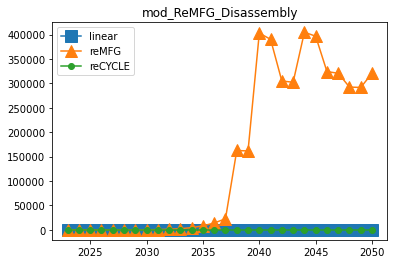

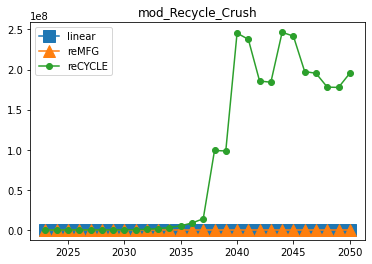

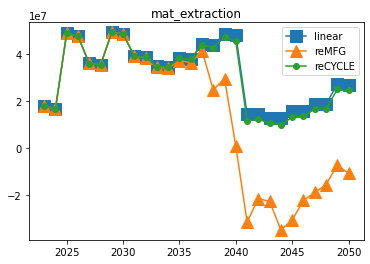

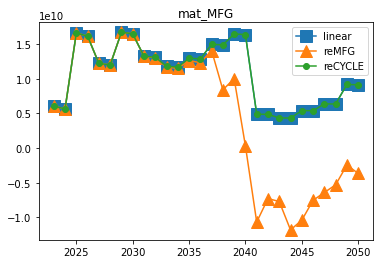

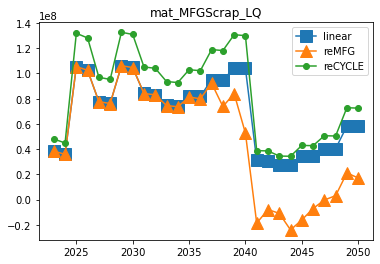

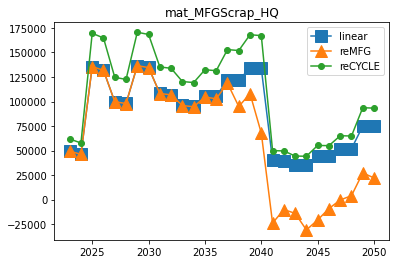

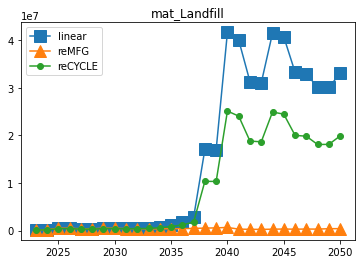

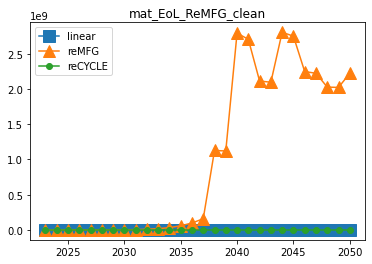

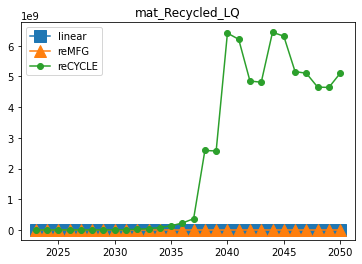

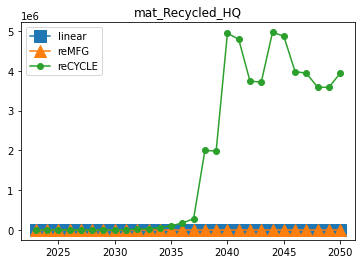

In [24]:
for key in r1_e_linear.keys():
    plt.plot(r1_e_linear.index, r1_e_linear[key], marker='s', ms=12, label='linear')
    plt.plot(r1_e_reMFG.index, r1_e_reMFG[key], marker='^', ms=12, label='reMFG')
    plt.plot(r1_e_reCYCLE.index, r1_e_reCYCLE[key], marker='o', label='reCYCLE')
    plt.legend()
    plt.title(str(key))
    plt.show()

# Calculations for file prep (module and glass)

### Module
We are doing a case study comparing recycling versus remanufacturing the glass for a perovskite module. The assumption is that the perovskite module lasts for 15 years, with weibull parameters that fail 10% of the modules before year 15, and a power degradation such that the module is at 80% of nameplate power at year 15. See the Lifetime vs Recycling journal for calculation of weibull parameters and degradation rates.

### Glass
The assumption is that a perovskite module will be a glass-glass package. Modern c-Si glass-glass (35% marketshare) bifacial modules (27% marketshare) are most likely 2.5mm front glass (28% marketshare) and 2.5 mm back glass (95% marketshare) [ITRPV 2022]. Therefore, we will assume a perovskite glass glass module will use 2 sheets of glass that are 2.5 mm thick.


In [25]:
density_glass = 2500*1000 # g/m^3    
glass_thickness = 2.5/1e3 #m
mass_glass = 2*glass_thickness*density_glass
print('The mass of glass per module area for a perovskite glass-glass package is assumed to be '+
     str(mass_glass) + ' g/m^2.')

The mass of glass per module area for a perovskite glass-glass package is assumed to be 12500.0 g/m^2.


## Energy flows (module and glass)

### Module
We will assume that a perovskite module is disassemble-able or openable with either a laser applied to a vacuum edge seal OR with a hot knife. Laser edge seal can be done with a 16 W laser. 

The hot knife procedure with EVA heats the blade to 300 C (https://www.npcgroup.net/eng/solarpower/reuse-recycle/dismantling#comp) and is currently only used on glass-backsheet modules. The NPC website indicates that cycle time is 60 seconds for one 6x10 cell module. Small commercially availble hot knives can achieve greater than 300C drawing less than 150W. We will assume worst case scenario; hot knife for 60 seconds at 150 W

In [26]:
e_hotknife_tot = 150*60*(1/3600)*(1/1000) # 150 W * 60 s = W*s *(hr/s)*(kW/W)
area_mod = 1.090*2.100 #m
e_hotknife = e_hotknife_tot/area_mod # E/module to E/m2
print('Energy for hot knife separation is '+ str(round(e_hotknife, 4))+' kWh/m2. This will be used as energy of module reMFG Disassembly')

Energy for hot knife separation is 0.0011 kWh/m2. This will be used as energy of module reMFG Disassembly


### Glass
The process to remove the perovskite from the glass is relatively simple regardless of architecture (all back contact or stack). A dunk in a water-based solvent at room temperature can remove the perovskite layer, and simple heating/baking or UV+Ozone steps should round out the cleaning preparation for a new perovskite deposition. 

Using Rodriguez-Garcia G, Aydin E, De Wolf S, Carlson B, Kellar J, Celik I. Life Cycle Assessment of Coated-Glass Recovery from Perovskite Solar Cells. ACS Sustainable Chem Eng [Internet]. 2021 Nov 3 [cited 2021 Nov 8]; Available from: https://doi.org/10.1021/acssuschemeng.1c05029, we will assume a room temperature water bath with sonication, a heating/drying/baking step, and a UV+Ozone step.


In [27]:
e_sonicate = 4  #kWh/m2 ultrasonication
e_uvozone = 3.57  #kWh/m2 ozone+UV
e_bake = 0.06  #kWh/m2 hot plate drying
e_glassreMFG_area = e_sonicate+e_uvozone+e_bake
e_glass_reMFG_mass = e_glassreMFG_area/(mass_glass/1000) #kWh/m2 *m2/g

print('Energy to remanufacture the glass (material energy only) is ' + str(round(e_glass_reMFG_mass, 2)) + 'kWh/kg')



Energy to remanufacture the glass (material energy only) is 0.61kWh/kg
